In [ ]:
# !pip install scanpy scvelo igraph louvain phate graphtools torch 'scFates==0.9.0' pyVIA s-gd2 scvi-tools

  Using cached igraph-0.11.9-cp39-abi3-macosx_11_0_arm64.whl.metadata (4.4 kB)
  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
INFO: pip is looking at multiple versions of leidenalg to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of python-igraph to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
Using cached igraph-0.11.9-cp39-abi3-macosx_11_0_arm64.whl (1.8 MB)
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 6.5 MB/s  0:00:02 eta 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      S

In [3]:
from matplotlib import pyplot as plt

In [ ]:
import scanpy as sc

adata = sc.datasets.paul15()
print(adata)       

sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

X_full = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
print(X_full.shape)
one_cell = X_full[0]
print(one_cell[:100])

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'
(2730, 3451)
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 3.3785636 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        3.3785636 0.        0.
 0.        0.        0.        0.        3.3785636 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0

In [ ]:
import scvelo as scv

scv.settings.verbosity = 3

adata = scv.datasets.pancreas()
print(adata)


scv.pp.filter_genes(adata, min_shared_counts=10)
scv.pp.normalize_per_cell(adata)
scv.pp.log1p(adata)

X_full = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
print(X_full.shape)
print(X_full[0][:100])

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'
Filtered out 19641 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
(3696, 8357)
[0.        0.        0.        0.        1.252936  0.        0.
 1.252936  0.        0.        2.9179997 0.        0.        1.252936
 0.        0.        0.        0.8110648 0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.8110648 0.        0.        0.8110648 0.        1.5583358 0.
 0.        0.        0.        0.        0.8110648 0.        0.
 0.        0.        0.8110648 0.        0.8110648 0.8110648 0.
 0.        0.        0.        0.        0.8110648 0.        0.
 0.        0.        0. 

/var/folders/0j/2jzqg98n7z9drwyz2xl9575h0000gp/T/ipykernel_90839/641657650.py:13: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


In [ ]:
import scanpy as sc

def prepare_graph(adata, n_pcs=50, n_neighbors=15):
    # (Optional but standard) pick highly variable genes
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
    adata = adata[:, adata.var["highly_variable"]]  # subset to HVGs

    sc.tl.pca(adata, n_comps=n_pcs, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    return adata

# Myeloid trajectory
adata_paul = sc.datasets.paul15()
sc.pp.filter_genes(adata_paul, min_cells=3)
sc.pp.normalize_total(adata_paul, target_sum=1e4)
sc.pp.log1p(adata_paul)
adata_paul = prepare_graph(adata_paul)

# Pancreas endocrinogenesis
import scvelo as scv
adata_pan = scv.datasets.pancreas()
scv.pp.filter_genes(adata_pan, min_shared_counts=10)
scv.pp.normalize_per_cell(adata_pan)
scv.pp.log1p(adata_pan)
adata_pan = prepare_graph(adata_pan)

import scanpy as sc

def prepare_graph_and_clusters(adata, n_pcs=50, n_neighbors=15):
    
    if "highly_variable" not in adata.var:
        sc.pp.highly_variable_genes(
            adata, flavor="seurat", n_top_genes=2000
        )
        adata = adata[:, adata.var["highly_variable"]].copy()

    sc.tl.pca(adata, n_comps=n_pcs, svd_solver="arpack")
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)


    if "louvain" not in adata.obs:
        sc.tl.louvain(adata, key_added="louvain")

    return adata


def pick_color_key(adata):
    preferred_keys = [
        "paul15_clusters", "clusters", "cell_type", "Celltype",
        "celltype", "cell_type_final", "annotation", "leiden", "louvain"
    ]
    for k in preferred_keys:
        if k in adata.obs.columns:
            return k
    return None 



Filtered out 19641 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.


/var/folders/0j/2jzqg98n7z9drwyz2xl9575h0000gp/T/ipykernel_90839/647656439.py:24: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_pan)


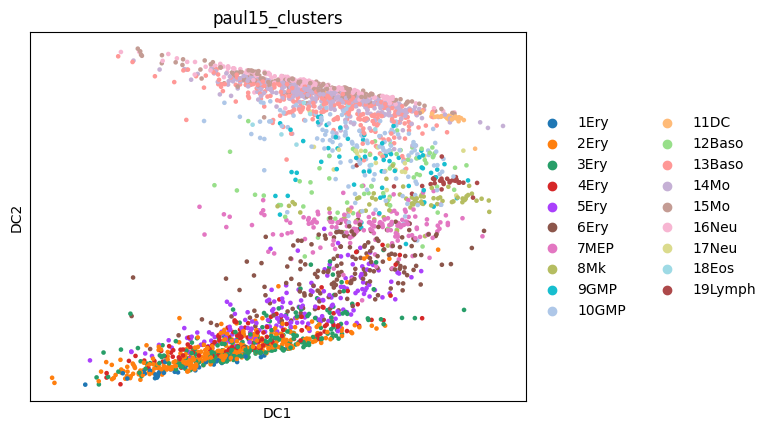

In [ ]:
adata = adata_paul
sc.tl.diffmap(adata)

sc.pl.diffmap(
    adata,
    color=['paul15_clusters'], 
    components=['1,2']
)


X_diff = adata.obsm['X_diffmap']   



In [8]:
# Myeloid
adata_paul = sc.datasets.paul15()
sc.pp.filter_genes(adata_paul, min_cells=3)
sc.pp.normalize_total(adata_paul, target_sum=1e4)
sc.pp.log1p(adata_paul)
adata_paul = prepare_graph_and_clusters(adata_paul)

# Pancreas
import scvelo as scv
adata_pan = scv.datasets.pancreas()
scv.pp.filter_genes(adata_pan, min_shared_counts=10)
scv.pp.normalize_per_cell(adata_pan)
scv.pp.log1p(adata_pan)
adata_pan = prepare_graph_and_clusters(adata_pan)

Filtered out 19641 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.


/var/folders/0j/2jzqg98n7z9drwyz2xl9575h0000gp/T/ipykernel_90839/3693367346.py:13: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_pan)


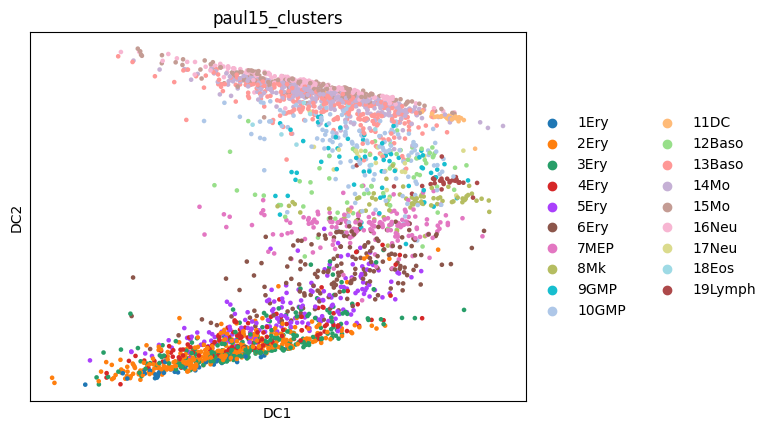

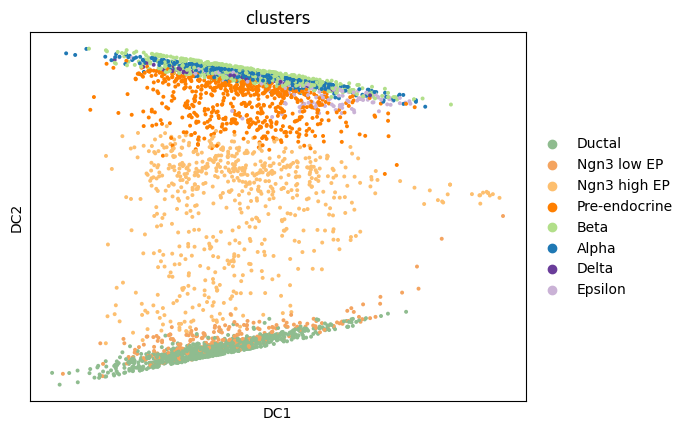

In [ ]:
color_key = pick_color_key(adata_paul)

sc.tl.diffmap(adata_paul)
sc.pl.diffmap(
    adata_paul,
    color=color_key,          
    components=["1,2"]
)

X_diff_paul = adata_paul.obsm["X_diffmap"]


color_key = pick_color_key(adata_pan)

sc.tl.diffmap(adata_pan)
sc.pl.diffmap(
    adata_pan,
    color=color_key,          
    components=["1,2"]
)

X_diff_pan = adata_pan.obsm["X_diffmap"]

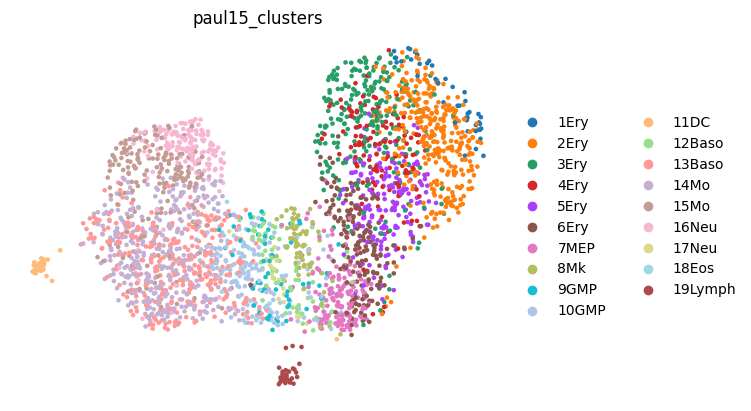

In [10]:
color_key = pick_color_key(adata_paul)

sc.tl.umap(adata_paul)
sc.pl.umap(
    adata_paul,
    color=color_key,
    frameon=False
)

X_umap_paul = adata_paul.obsm["X_umap"]

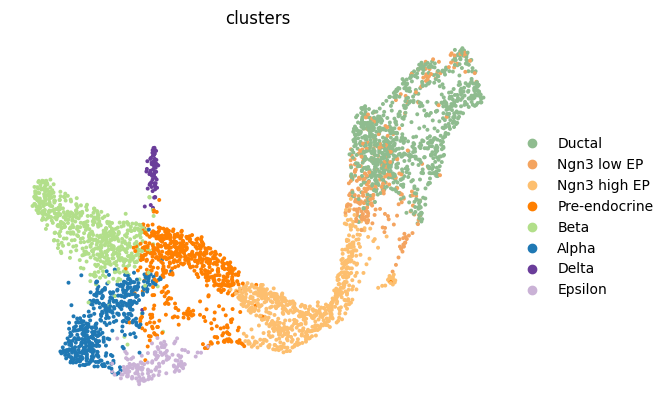

In [11]:
color_key = pick_color_key(adata_pan)

sc.tl.umap(adata_pan)
sc.pl.umap(
    adata_pan,
    color=color_key,
    frameon=False
)

X_umap_pan = adata_pan.obsm["X_umap"]

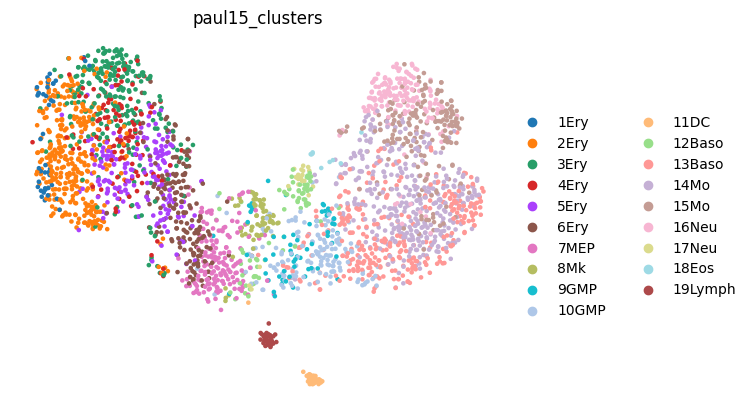

In [12]:
color_key = pick_color_key(adata_paul)

sc.tl.tsne(adata_paul, n_pcs=30, use_rep="X_pca")
sc.pl.tsne(
    adata_paul,
    color=color_key,
    frameon=False
)

X_tsne_paul = adata_paul.obsm["X_tsne"]

Calculating PHATE...
  Running PHATE on 2730 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.35 seconds.
  Calculated graph and diffusion operator in 0.41 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.13 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.14 seconds.
  Calculated landmark operator in 1.27 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.68 seconds.
  Calculating metric MDS...
    SGD-MDS may not have converged: stress changed by 12.2% in final iterations. Consider increasing n_iter or adjusting learning_rate.
  Calculated metric MDS in 1.20 seconds.
Calculated PHATE in 4.36 seconds.


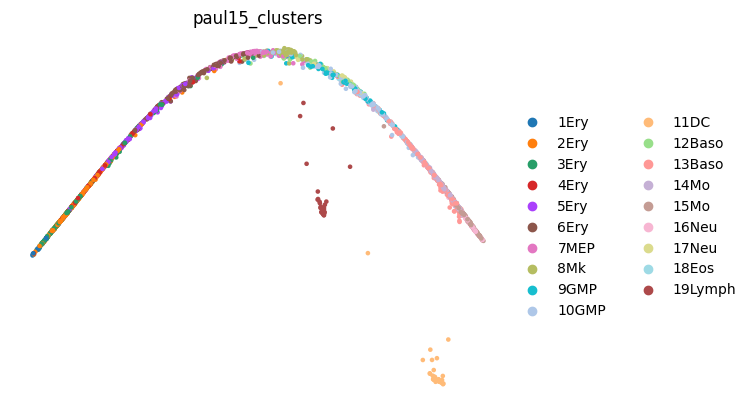

In [ ]:
import phate

X_input = adata_paul.obsm["X_pca"]

phate_op = phate.PHATE(
    n_components=2,
    knn=15,
    t="auto",      
    mds="metric",  
    n_jobs=-1      
)

X_phate_paul = phate_op.fit_transform(X_input)
adata_paul.obsm["X_phate"] = X_phate_paul

color_key = pick_color_key(adata_paul)  

sc.pl.embedding(
    adata_paul,
    basis="phate",     
    color=color_key,
    frameon=False
)

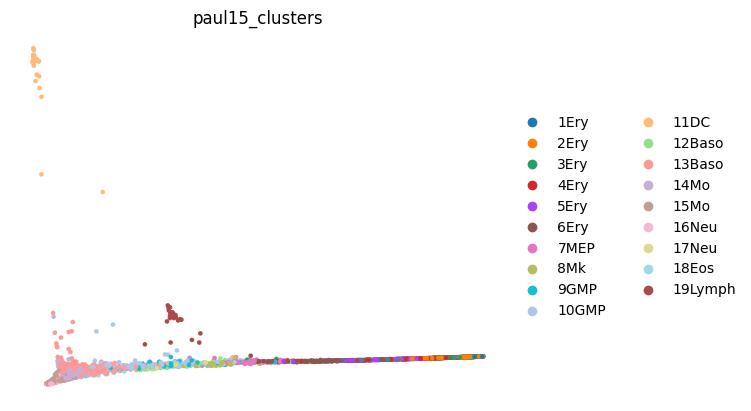

In [ ]:
from sklearn.manifold import SpectralEmbedding

color_key = pick_color_key(adata_paul)
A = adata_paul.obsp["connectivities"]

spec = SpectralEmbedding(
    n_components=2,
    affinity="precomputed"
)
X_lapeig_paul = spec.fit_transform(A)
adata_paul.obsm["X_lapeig"] = X_lapeig_paul  


sc.pl.embedding(
    adata_paul,
    basis="X_lapeig",    
    color=color_key,
    frameon=False
)

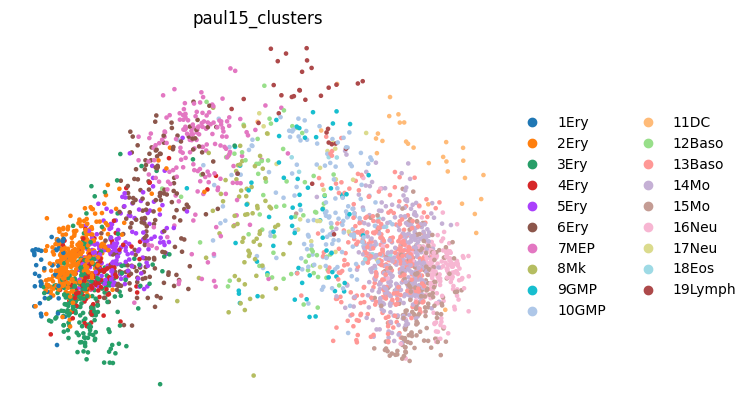

In [15]:
from sklearn.manifold import Isomap

color_key = pick_color_key(adata_paul)
X_input = adata_paul.obsm["X_pca"]

iso = Isomap(
    n_neighbors=15,
    n_components=2
)
X_iso_paul = iso.fit_transform(X_input)
adata_paul.obsm["X_isomap"] = X_iso_paul

# Note: NO x="0", y="1" here
sc.pl.embedding(
    adata_paul,
    basis="X_isomap",     # match the actual key
    color=color_key,
    frameon=False
)

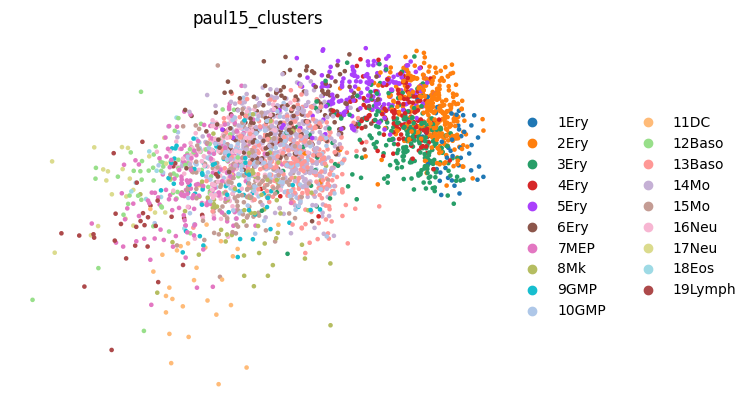

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

class AE(nn.Module):
    def __init__(self, input_dim, latent_dim=8):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z


X = adata_paul.X
X = X.toarray() if hasattr(X, "toarray") else X
X_tensor = torch.tensor(X, dtype=torch.float32)

model = AE(input_dim=X_tensor.shape[1], latent_dim=8)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loader = DataLoader(TensorDataset(X_tensor), batch_size=256, shuffle=True)

for epoch in range(20):
    for (batch,) in loader:
        x_hat, z = model(batch)
        loss = ((x_hat - batch) ** 2).mean()
        opt.zero_grad()
        loss.backward()
        opt.step()

with torch.no_grad():
    _, Z = model(X_tensor)
adata_paul.obsm["X_ae"] = Z.numpy()

color_key = pick_color_key(adata_paul)
sc.pl.embedding(adata_paul, basis="X_ae", color=color_key, frameon=False)

inferring a principal tree --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01


/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/elpigraph/src/grammar_operations.py:398: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MuProt[i] = Mus[ineighbour]


    there are 1 non assigned nodes
--> added 
    .uns['epg'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.
tips: [ 3  4  9 10 11 12 13 15 19 21 23 27]
forks: [0 1]
Using tip node 3 as root
node 3 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
B shape: (30, 30)
F shape: (10, 30)


/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/elpigraph/utils.py:18: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  mat_conn = nx.to_scipy_sparse_matrix(


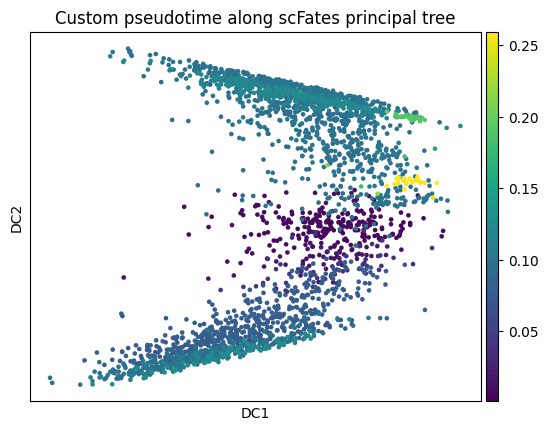

In [ ]:
import scFates as scf

# Solution: Try with fewer nodes and adjusted parameters to avoid topology issues
scf.tl.tree(
    adata_paul,
    Nodes=30,           # Reduced from 40 to avoid over-complex tree
    use_rep="X_diffmap",
    ndims_rep=10,
    method="epg"
)

# Peek at tips and forks to pick a root interactively
print("tips:", adata_paul.uns["graph"]["tips"])
print("forks:", adata_paul.uns["graph"]["forks"])

# Choose a root - try using one of the tips instead of node 3
# Let's use the first tip as the root
root_id = adata_paul.uns["graph"]["tips"][0]
print(f"Using tip node {root_id} as root")

scf.tl.root(adata_paul, root=root_id)


import numpy as np
import networkx as nx

graph = adata_paul.uns["graph"]
B = graph["B"]           
F = graph["F"]           


print("B shape:", B.shape)
print("F shape:", F.shape)

n_nodes = B.shape[0]     
assert F.shape[1] == n_nodes


G = nx.Graph()
for i in range(n_nodes):
    for j in range(i + 1, n_nodes):
        if B[i, j] > 0:
            w = float(np.linalg.norm(F[:, i] - F[:, j]))
            G.add_edge(i, j, weight=w)


root_id = int(adata_paul.uns["graph"]["root"]) 
dist_dict = nx.single_source_dijkstra_path_length(G, root_id)
node_t = np.array([dist_dict.get(i, np.nan) for i in range(n_nodes)])


R = np.asarray(adata_paul.obsm["X_R"])         
row_sums = R.sum(axis=1, keepdims=True)
valid = row_sums.squeeze() > 0

weights = np.zeros_like(R, dtype=float)
weights[valid] = R[valid] / row_sums[valid]

cell_t = weights.dot(node_t)
adata_paul.obs["t_custom"] = cell_t

sc.pl.diffmap(
    adata_paul,
    color="t_custom",
    title="Custom pseudotime along scFates principal tree",
)

In [1]:
import scFates as scf
print(scf.__version__)

/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


0.9.0


In [28]:
!pip install 'scFates==0.9.0'

  Attempting uninstall: elpigraph-python
    Found existing installation: elpigraph-python 0.3.2
    Uninstalling elpigraph-python-0.3.2:
      Successfully uninstalled elpigraph-python-0.3.20/2 [elpigraph-python]
  Attempting uninstall: scFates━━━━━━━━━━━━━ 0/2 [elpigraph-python]
    Found existing installation: scFates 1.1.10m 0/2 [elpigraph-python]
    Uninstalling scFates-1.1.1:━━━━━━━━━━━━━ 0/2 [elpigraph-python]
      Successfully uninstalled scFates-1.1.1 0/2 [elpigraph-python]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scFates]thon]


In [ ]:
try:
    import scFates as scf
    
    scf.tl.pseudotime_rw(adata_paul) 
except Exception as e:
    print(e)


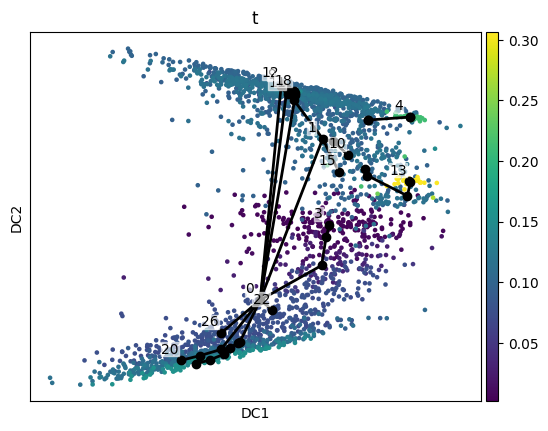

In [ ]:

scf.pl.graph(
    adata_paul,
    basis="diffmap",
    color_cells="t",  
)

import scFates as scf
import pandas as pd

if 't' not in adata_paul.obs.columns:

    try:
        scf.tl.tree(
            adata_paul,
            Nodes=25,           
            use_rep="X_pca",    
            ndims_rep=15,
            method="epg"
        )
        
        root_id = adata_paul.uns["graph"]["tips"][0]
        scf.tl.root(adata_paul, root=root_id)
        
        scf.tl.pseudotime(adata_paul, n_map=30, n_jobs=1)
        
    except Exception as e:
        print()
else:
    print()


scf.pl.graph(
    adata_paul,
    basis="diffmap",
    color_cells="t",   
)

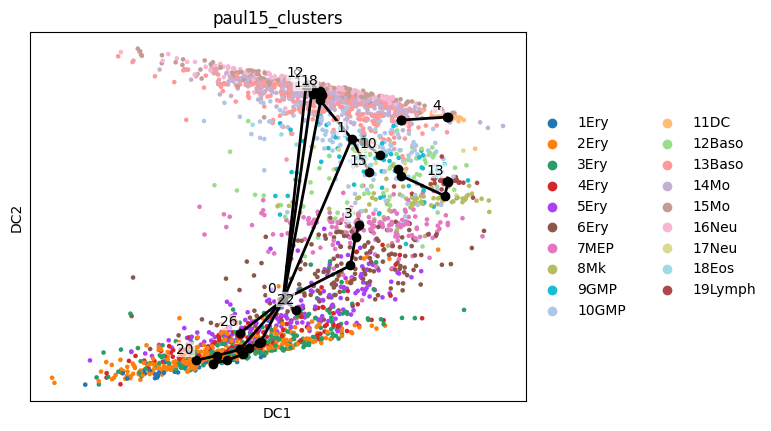

In [18]:
scf.pl.graph(
    adata_paul,
    basis="diffmap",
    color_cells="paul15_clusters",
)

3 nodes have zero total weight


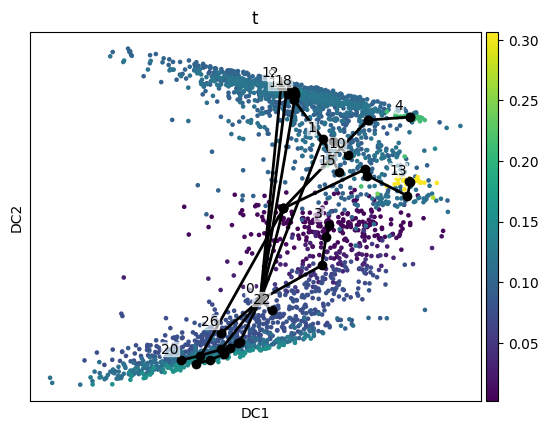

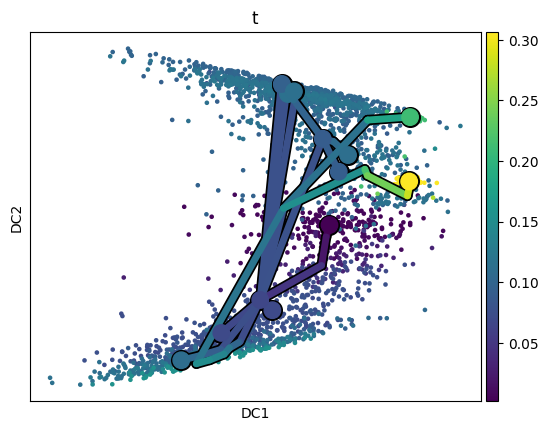

In [ ]:
import numpy as np

R = adata_paul.obsm["X_R"]
col_sums = R.sum(axis=0)
zero_cols = col_sums == 0

print(f"{zero_cols.sum()} nodes have zero total weight")

if zero_cols.any():
    R[:, zero_cols] = 1.0 / R.shape[0]
    adata_paul.obsm["X_R"] = R


scf.pl.graph(
    adata_paul,
    basis="diffmap",
    color_cells="t",
)

scf.pl.trajectory(
    adata_paul,
    basis="diffmap",
    color_cells="t",
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.000472871462504069 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)
/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this packa

Time for shortest paths: 0.054929566383361814 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9988
Correlation at iteration 2: 0.9998
Correlation at iteration 3: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


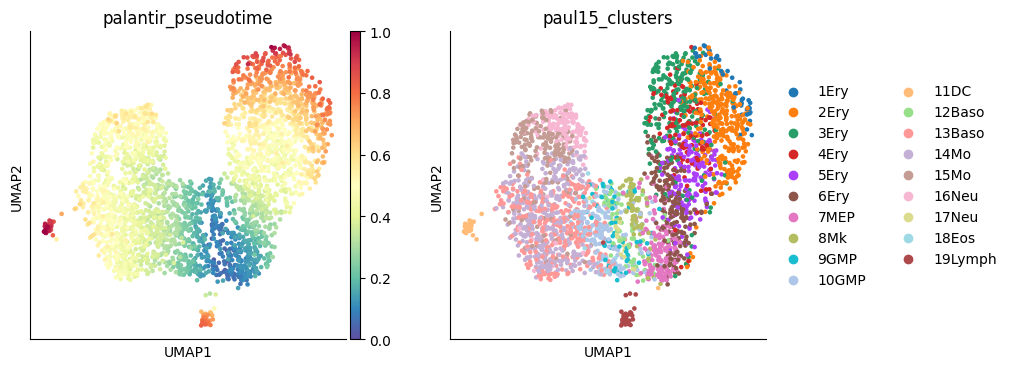

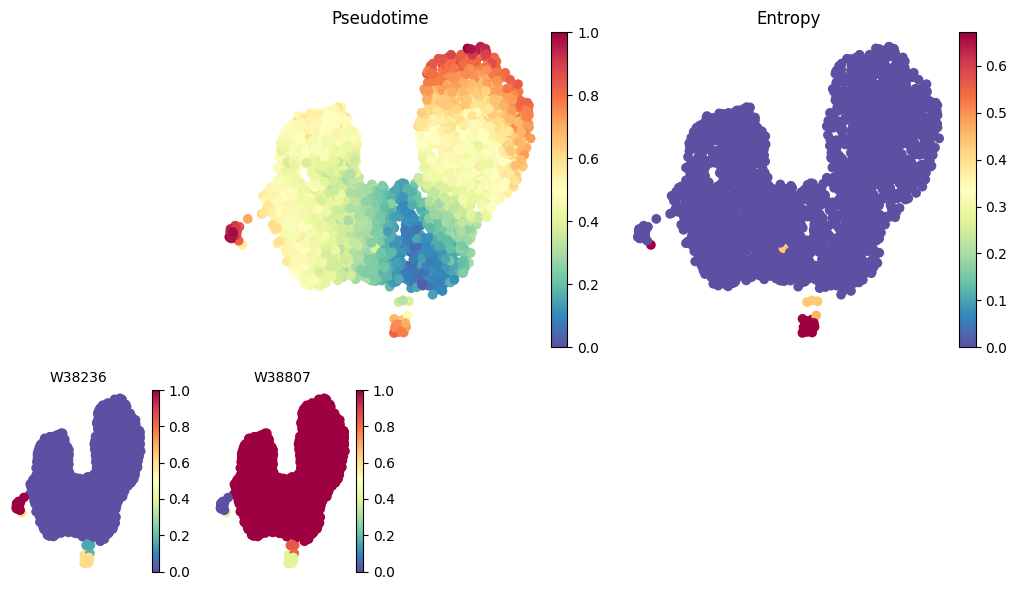

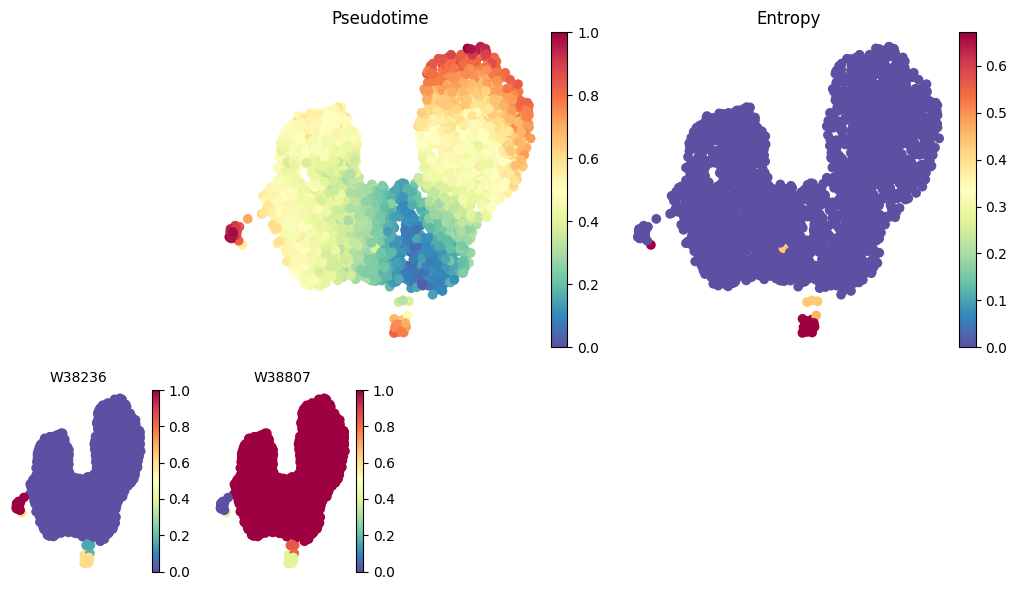

In [ ]:
import palantir
import pandas as pd
import numpy as np


if 'X_diffmap' in adata_paul.obsm:
    adata_paul.obsm['DM_EigenVectors'] = adata_paul.obsm['X_diffmap']
    if 'diffmap_evals' in adata_paul.uns:
        adata_paul.uns['DM_EigenValues'] = adata_paul.uns['diffmap_evals']


palantir.utils.determine_multiscale_space(adata_paul)


early_cell = adata_paul.obs_names[0]

pr_res = palantir.core.run_palantir(
    adata_paul, 
    early_cell=early_cell,
    num_waypoints=500  
)

color_key = pick_color_key(adata_paul)
sc.pl.umap(adata_paul, color=["palantir_pseudotime", color_key])

palantir.plot.plot_palantir_results(adata_paul, embedding_basis="X_umap")

In [ ]:
try:
    import pyVIA.core as via
    
    X = adata_paul.obsm["X_pca"][:, :30]  # Can also use X_diffmap or X_phate
    labels = adata_paul.obs['paul15_clusters'].values.astype(str)
    
    v = via.VIA(
        data=X,
        true_label=labels,
        knn=15,                      
        root=[0],                    
        random_seed=42,
        is_coarse=True,              
        preserve_disconnected=False, 
        dataset='paul15',            
        n_jobs=-1                    
    )
    
    print("Running VIA trajectory inference...")
    v.run_VIA()
    
    adata_paul.obs["via_pseudotime"] = v.single_cell_pt_markov
    
    
    print(f"VIA detected {len(v.terminal_clusters)} terminal states")
    
    
    color_key = pick_color_key(adata_paul)
    sc.pl.umap(adata_paul, color=["via_pseudotime", color_key])
    
    
    
except ImportError as e:
    print()
except Exception as e:
    print()


Computing PAGA graph...

Available clusters: ['7MEP', '15Mo', '3Ery', '4Ery', '2Ery', ..., '6Ery', '19Lymph', '12Baso', '18Eos', '11DC']
Length: 19
Categories (19, object): ['1Ery', '2Ery', '3Ery', '4Ery', ..., '16Neu', '17Neu', '18Eos', '19Lymph']
Using cluster 7MEP as root

Computing DPT pseudotime...
✅ PAGA + DPT trajectory inference complete!

Generating PAGA visualizations...


/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


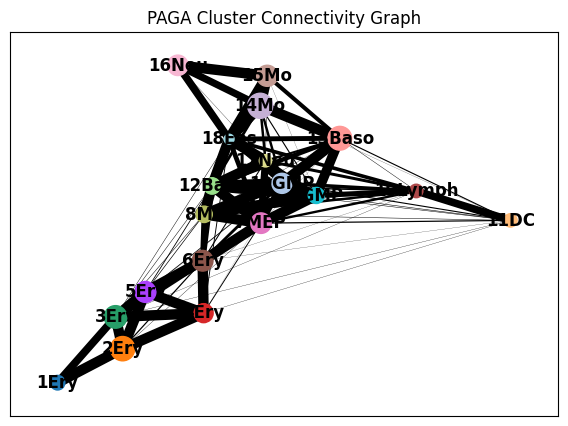

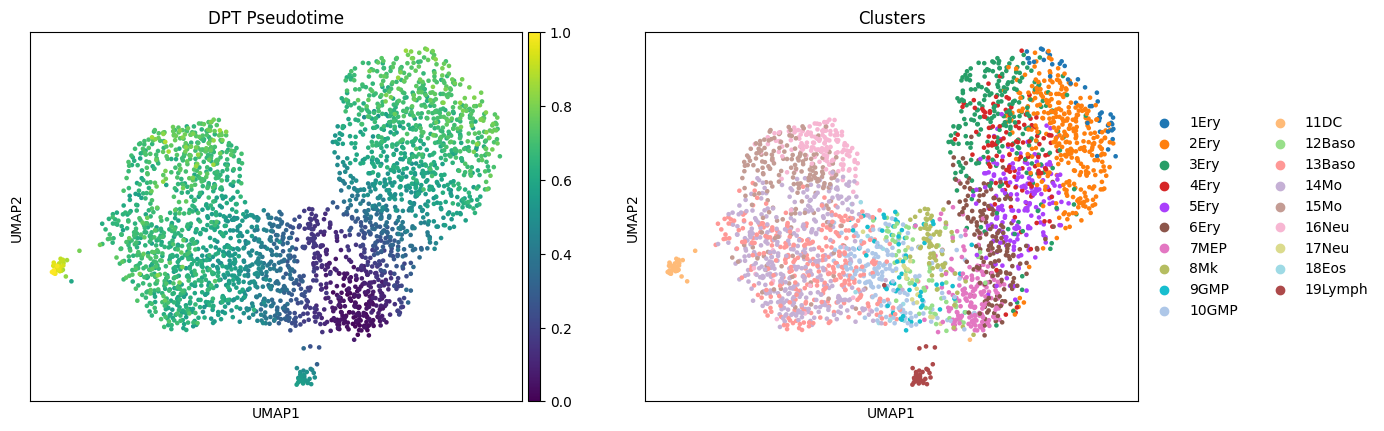

/Users/chand/miniconda3/envs/.UML/lib/python3.11/site-packages/networkx/convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


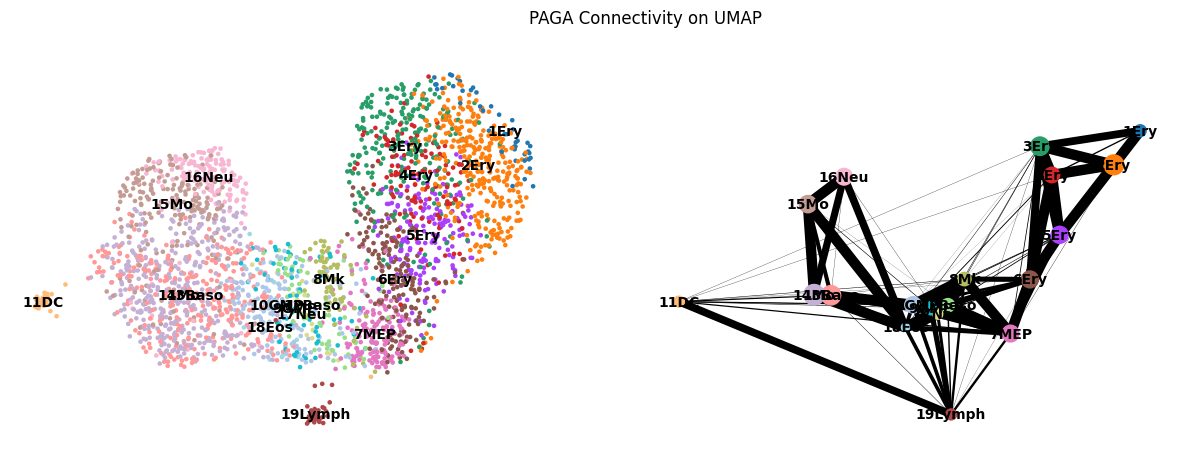

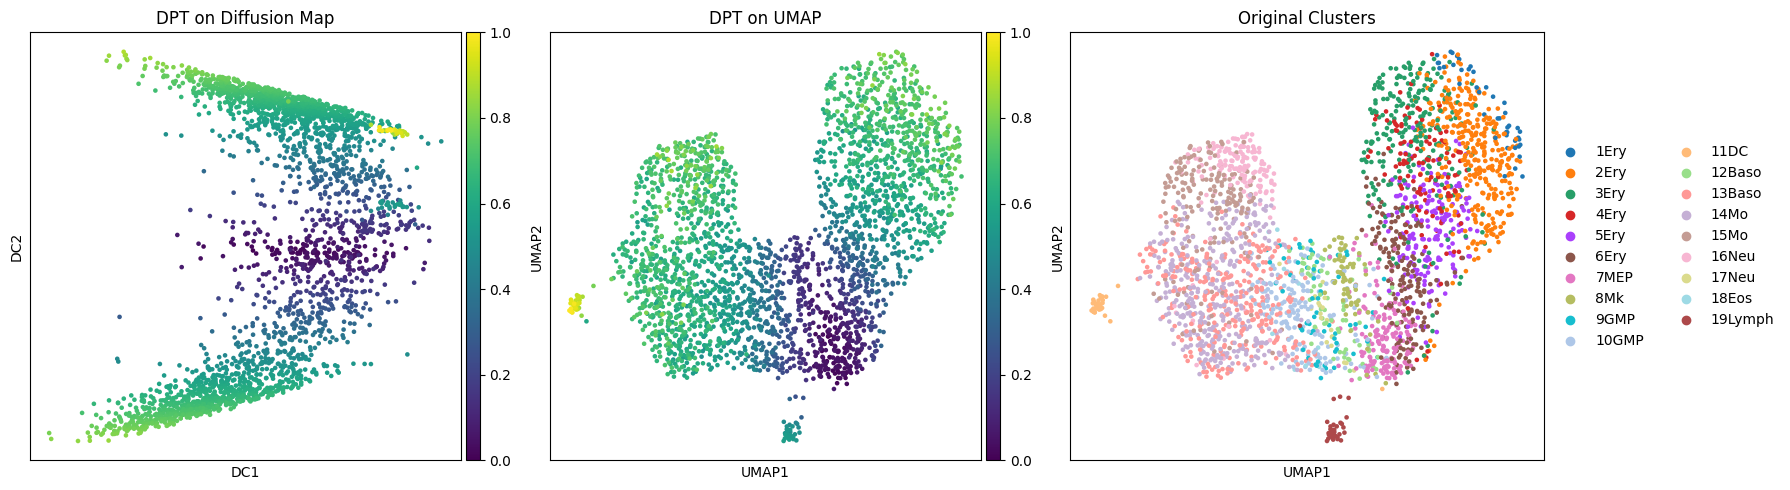


📊 DPT Results stored in adata_paul.obs['dpt_pseudotime']
📊 PAGA connectivity stored in adata_paul.uns['paga']


In [ ]:
import numpy as np

print("Computing PAGA graph...")
sc.tl.paga(
    adata_paul, 
    groups='paul15_clusters',  
    model='v1.2'               
)


print("\nAvailable clusters:", adata_paul.obs['paul15_clusters'].unique())


root_cluster = adata_paul.obs['paul15_clusters'].unique()[0]
print(f"Using cluster {root_cluster} as root")

root_cell_idx = np.flatnonzero(adata_paul.obs['paul15_clusters'] == root_cluster)[0]
adata_paul.uns['iroot'] = root_cell_idx

print("\nComputing DPT pseudotime...")
sc.tl.dpt(adata_paul, n_dcs=10)  

color_key = pick_color_key(adata_paul)

print("\nGenerating PAGA visualizations...")
sc.pl.paga(
    adata_paul, 
    color=color_key,
    fontsize=12,
    node_size_scale=1.5,
    title='PAGA Cluster Connectivity Graph'
)

sc.pl.umap(
    adata_paul, 
    color=['dpt_pseudotime', color_key],
    title=['DPT Pseudotime', 'Clusters'],
    cmap='viridis'
)

sc.pl.paga_compare(
    adata_paul, 
    basis='umap',
    color=color_key,
    title='PAGA Connectivity on UMAP',
    legend_loc='on data',
    frameon=False
)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pseudotime on diffusion map
sc.pl.diffmap(
    adata_paul, 
    color='dpt_pseudotime',
    ax=axes[0],
    show=False,
    title='DPT on Diffusion Map'
)

# Pseudotime on UMAP
sc.pl.umap(
    adata_paul, 
    color='dpt_pseudotime',
    ax=axes[1],
    show=False,
    title='DPT on UMAP'
)

# Clusters
sc.pl.umap(
    adata_paul, 
    color=color_key,
    ax=axes[2],
    show=False,
    title='Original Clusters'
)

plt.tight_layout()
plt.show()

print("\n📊 DPT Results stored in adata_paul.obs['dpt_pseudotime']")
print("📊 PAGA connectivity stored in adata_paul.uns['paga']")


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores


✅ scvi-tools version: 1.4.0.post1

Setting up AnnData for scVI...
Creating scVI model...
Training scVI model...
Epoch 296/400:  74%|███████▍  | 296/400 [02:06<00:44,  2.34it/s, v_num=1, train_loss=1.31e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1419.662. Signaling Trainer to stop.
Extracting latent representation...
Computing neighbors and UMAP on scVI latent space...


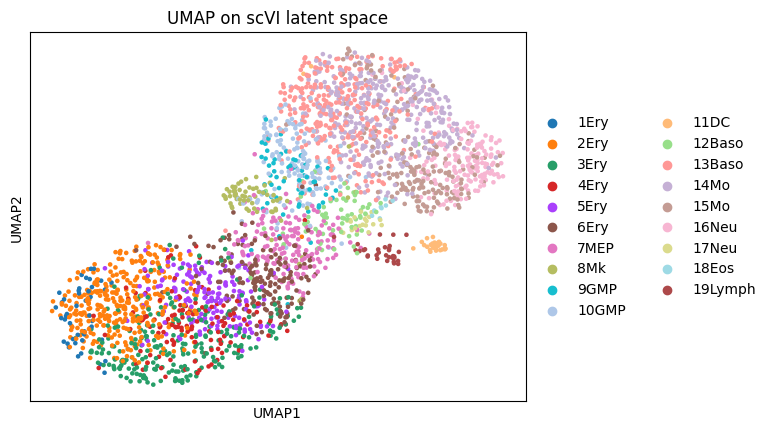

✅ scVI embedding computed and stored in adata_paul.obsm['X_scvi']
   Use this as input to other analyses: sc.pp.neighbors(adata, use_rep='X_scvi')


In [ ]:
try:
    import scvi

        
except ImportError as e:
    print()
print("\nSetting up AnnData for scVI...")


scvi.model.SCVI.setup_anndata(
    adata_paul,
    layer=None, 
)

# Create scVI model
print("Creating scVI model...")
model = scvi.model.SCVI(
    adata_paul,
    n_latent=10,          
    n_layers=2,           
    n_hidden=128,         
    gene_likelihood="nb"  
)

# Train the model
print("Training scVI model...")
model.train(
    max_epochs=400,
    early_stopping=True,
    train_size=0.9, 
)

print("Extracting latent representation...")
adata_paul.obsm["X_scvi"] = model.get_latent_representation()

print("Computing neighbors and UMAP on scVI latent space...")
sc.pp.neighbors(adata_paul, use_rep="X_scvi", n_neighbors=15)
sc.tl.umap(adata_paul)

# Visualize
color_key = pick_color_key(adata_paul)
sc.pl.umap(
    adata_paul, 
    color=[color_key],
    title='UMAP on scVI latent space'
)



## Mining the manifold

In [ ]:
import numpy as np

def get_Z(adata, key, dims=None):
    Z = np.asarray(adata.obsm[key])
    if dims is not None:
        Z = Z[:, :dims]
    return Z.astype("float32")

In [ ]:
from sklearn.neighbors import NearestNeighbors

def build_knn_decoder(Z_ref, X_ref, n_neighbors=10):
    """
    Z_ref: (n_cells, d) manifold coords
    X_ref: (n_cells, n_genes) expression matrix
    Returns: decode(Z_new) -> X_new
    """
    Z_ref = np.asarray(Z_ref, dtype="float32")
    X_ref = np.asarray(X_ref, dtype="float32")
    
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean")
    knn.fit(Z_ref)

    def decode(Z_new):
        Z_new = np.asarray(Z_new, dtype="float32")
        dists, idx = knn.kneighbors(Z_new)         
        
        eps = 1e-6
        w = 1.0 / (dists + eps)
        w = w / w.sum(axis=1, keepdims=True)       
        X_new = (w[..., None] * X_ref[idx]).sum(axis=1)
        return X_new

    return decode

In [27]:
X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw

Z_umap = get_Z(adata_paul, "X_umap", dims=2)
decode_umap = build_knn_decoder(Z_umap, X_raw)

In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

class ScoreNet(nn.Module):
    """
    Time-conditional MLP: s_theta(z, t) ≈ ∇_z log p_t(z)
    """
    def __init__(self, dim, hidden=128):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(dim + 1, hidden),
            nn.SiLU(),
            nn.Linear(hidden, hidden),
            nn.SiLU(),
            nn.Linear(hidden, dim),
        )

    def forward(self, z, t):
        # z: (B, d), t: (B,) in [0,1]
        t = t.view(-1, 1)
        h = torch.cat([z, t], dim=1)
        return self.mlp(h)

In [ ]:
def train_score_model(
    Z_np,
    n_epochs=200,
    batch_size=256,
    lr=1e-3,
    sigma_min=0.01,
    sigma_max=1.0,
    device="cuda" if torch.cuda.is_available() else "cpu",
):

    Z = torch.tensor(Z_np, dtype=torch.float32)
    dataset = TensorDataset(Z)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    dim = Z.shape[1]
    model = ScoreNet(dim).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(n_epochs):
        for (z_batch,) in loader:
            z_batch = z_batch.to(device)

            # sample time and noise scale
            t = torch.rand(z_batch.size(0), device=device)  # Uniform[0,1]
            log_sigma = torch.log(torch.tensor(sigma_min)) + \
                        t * (torch.log(torch.tensor(sigma_max)) - torch.log(torch.tensor(sigma_min)))
            sigma = torch.exp(log_sigma)

            # add noise
            noise = torch.randn_like(z_batch)
            z_noisy = z_batch + sigma.view(-1, 1) * noise

            # target score: ∇_z log p_t(z) = -(1/σ^2) * (z_noisy - z)
            target = - (z_noisy - z_batch) / (sigma.view(-1, 1) ** 2)

            pred = model(z_noisy, t)
            loss = ((pred - target) ** 2).mean()

            opt.zero_grad()
            loss.backward()
            opt.step()

        if (epoch + 1) % 50 == 0:
            print(f"[ScoreNet] epoch {epoch+1}, loss={loss.item():.4f}")

    return model

In [ ]:
@torch.no_grad()
def sample_score_model(
    model,
    n_samples,
    dim,
    n_steps=200,
    sigma_min=0.01,
    sigma_max=1.0,
    device="cuda" if torch.cuda.is_available() else "cpu",
):
    """
    Draw synthetic samples in latent space via annealed Langevin dynamics.
    """
    model.eval()
    z = torch.randn(n_samples, dim, device=device) * sigma_max  

    sigmas = torch.exp(torch.linspace(
        torch.log(torch.tensor(sigma_max)),
        torch.log(torch.tensor(sigma_min)),
        n_steps,
        device=device
    ))

    for i, sigma in enumerate(sigmas):
        t = (torch.log(sigma) - torch.log(torch.tensor(sigma_min, device=device))) / \
            (torch.log(torch.tensor(sigma_max, device=device)) - torch.log(torch.tensor(sigma_min, device=device)))
        t = t.clamp(0, 1).expand(n_samples)

        grad = model(z, t)  # score ∇_z log p_t(z)

        step_size = (sigma ** 2) * 0.1  # heuristic
        noise = torch.randn_like(z)
        z = z + step_size * grad + (2 * step_size) ** 0.5 * noise

    return z.cpu().numpy()

In [31]:
import scipy.sparse as sp
import numpy as np

def build_rw_transition(W_sparse):
    """
    Given sparse weight matrix W (n_cells x n_cells),
    return row-stochastic transition matrix P as sparse.
    """
    W = W_sparse.tocsr().astype("float64")
    row_sum = np.array(W.sum(axis=1)).flatten()
    row_sum[row_sum == 0] = 1.0
    D_inv = sp.diags(1.0 / row_sum)
    P = D_inv @ W
    return P.tocsr()

def random_walk_samples(P, start_idx, n_steps, n_traj):
    """
    P: (n_cells x n_cells) sparse transition matrix
    start_idx: int or array of starting cells
    """
    n_cells = P.shape[0]
    P_csr = P.tocsr()

    if np.isscalar(start_idx):
        starts = np.full(n_traj, start_idx, dtype=int)
    else:
        starts = np.asarray(start_idx, dtype=int)
        if starts.size < n_traj:
            starts = np.random.choice(starts, size=n_traj, replace=True)

    paths = np.zeros((n_traj, n_steps + 1), dtype=int)
    paths[:, 0] = starts

    for t in range(1, n_steps + 1):
        prev = paths[:, t - 1]
        nxt = []
        for i in prev:
            row = P_csr.getrow(i)
            probs = row.data
            cols = row.indices
            if probs.size == 0:
                nxt.append(i)
            else:
                nxt.append(np.random.choice(cols, p=probs / probs.sum()))
        paths[:, t] = np.array(nxt, dtype=int)

    return paths

In [ ]:

Z_diff = get_Z(adata_paul, "X_diffmap")[:, 1:3]   

score_diff = train_score_model(Z_diff, n_epochs=200)
Z_diff_samples = sample_score_model(score_diff, n_samples=1000, dim=Z_diff.shape[1])

# decode to gene space
X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_diff = build_knn_decoder(Z_diff, X_raw)

X_new_diff = decode_diff(Z_diff_samples)  

[ScoreNet] epoch 50, loss=812.2007
[ScoreNet] epoch 100, loss=668.8071
[ScoreNet] epoch 150, loss=685.4255
[ScoreNet] epoch 200, loss=587.3894


In [ ]:
W = adata_paul.obsp["connectivities"]  
P = build_rw_transition(W)

paths = random_walk_samples(P, start_idx=0, n_steps=50, n_traj=200)


X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
traj_expr = X_raw[paths]       

In [34]:
Z_umap = get_Z(adata_paul, "X_umap", dims=2)

# train score model
score_umap = train_score_model(Z_umap, n_epochs=200)

# sample in UMAP space
Z_umap_samples = sample_score_model(score_umap, n_samples=1000, dim=Z_umap.shape[1])

# decode via kNN in UMAP space
X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_umap = build_knn_decoder(Z_umap, X_raw)

X_new_umap = decode_umap(Z_umap_samples)

[ScoreNet] epoch 50, loss=1312.4080
[ScoreNet] epoch 100, loss=1087.6494
[ScoreNet] epoch 150, loss=936.9792
[ScoreNet] epoch 200, loss=817.5743


In [35]:
Z_tsne = get_Z(adata_paul, "X_tsne", dims=2)

score_tsne = train_score_model(Z_tsne, n_epochs=200)
Z_tsne_samples = sample_score_model(score_tsne, n_samples=1000, dim=Z_tsne.shape[1])

X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_tsne = build_knn_decoder(Z_tsne, X_raw)

X_new_tsne = decode_tsne(Z_tsne_samples)

[ScoreNet] epoch 50, loss=971.8763
[ScoreNet] epoch 100, loss=1243.7324
[ScoreNet] epoch 150, loss=1360.5574
[ScoreNet] epoch 200, loss=1673.0061


In [36]:
Z_phate = get_Z(adata_paul, "X_phate", dims=2)

score_phate = train_score_model(Z_phate, n_epochs=200)
Z_phate_samples = sample_score_model(score_phate, n_samples=1000, dim=Z_phate.shape[1])

X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_phate = build_knn_decoder(Z_phate, X_raw)

X_new_phate = decode_phate(Z_phate_samples)

[ScoreNet] epoch 50, loss=948.5002
[ScoreNet] epoch 100, loss=513.1169
[ScoreNet] epoch 150, loss=470.0435
[ScoreNet] epoch 200, loss=633.9126


In [37]:
Z_lap = get_Z(adata_paul, "X_lapeig", dims=2)

score_lap = train_score_model(Z_lap, n_epochs=200)
Z_lap_samples = sample_score_model(score_lap, n_samples=1000, dim=Z_lap.shape[1])

X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_lap = build_knn_decoder(Z_lap, X_raw)

X_new_lap = decode_lap(Z_lap_samples)

[ScoreNet] epoch 50, loss=890.8386
[ScoreNet] epoch 100, loss=389.8778
[ScoreNet] epoch 150, loss=210.1296
[ScoreNet] epoch 200, loss=122.3288


In [38]:
Z_iso = get_Z(adata_paul, "X_isomap", dims=2)

score_iso = train_score_model(Z_iso, n_epochs=200)
Z_iso_samples = sample_score_model(score_iso, n_samples=1000, dim=Z_iso.shape[1])

X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_iso = build_knn_decoder(Z_iso, X_raw)

X_new_iso = decode_iso(Z_iso_samples)

[ScoreNet] epoch 50, loss=1081.0094
[ScoreNet] epoch 100, loss=1077.8357
[ScoreNet] epoch 150, loss=1387.5927
[ScoreNet] epoch 200, loss=968.0983


In [ ]:
Z_ae = get_Z(adata_paul, "X_ae", dims=8)

score_ae = train_score_model(Z_ae, n_epochs=300)
Z_ae_samples = sample_score_model(score_ae, n_samples=1000, dim=Z_ae.shape[1])

# decode with AE decoder
model.eval()
with torch.no_grad():
    Z_ae_tensor = torch.tensor(Z_ae_samples, dtype=torch.float32)
    X_new_ae, _ = model.decoder(Z_ae_tensor), None  
X_new_ae = X_new_ae.cpu().numpy()

[ScoreNet] epoch 50, loss=1120.9277
[ScoreNet] epoch 100, loss=911.5134
[ScoreNet] epoch 150, loss=1208.0764
[ScoreNet] epoch 200, loss=1138.6689
[ScoreNet] epoch 250, loss=892.9863
[ScoreNet] epoch 300, loss=999.4208


AttributeError: 'SCVI' object has no attribute 'eval'

In [ ]:
scvi_model = model   
z_samples = torch.tensor(Z_scvi_samples, dtype=torch.float32)


In [ ]:
graph = adata_paul.uns["graph"]
B = graph["B"]         
F = graph["F"]         
n_nodes = B.shape[0]

B_sparse = sp.csr_matrix(B)
P_nodes = build_rw_transition(B_sparse)

paths_nodes = random_walk_samples(P_nodes, start_idx=int(graph["root"]), 
                                  n_steps=50, n_traj=200)

# get node coordinates for each step (n_traj, n_steps+1, n_dims)
node_coords = F[:, paths_nodes]        
node_coords = np.moveaxis(node_coords, 0, -1)  

In [ ]:
R = np.asarray(adata_paul.obsm["X_R"])       
X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw

# Build node->cell decoder: node distributions over cells
# R: cell x node => transpose and normalize
node_to_cell = R.T
node_to_cell = node_to_cell / (node_to_cell.sum(axis=1, keepdims=True) + 1e-8)

def decode_node_index_to_expr(node_idx):
    """
    node_idx: (T,) path of node indices
    Returns: (T, n_genes) expression trajectory
    """
    weights = node_to_cell[node_idx]           
    expr = weights @ X_raw                    
    return expr

In [ ]:
Z_pal = np.asarray(adata_paul.obsm["DM_EigenVectors_multiscaled"], dtype="float32")
Z_pal = Z_pal[:, :5]  

score_pal = train_score_model(Z_pal, n_epochs=300)
Z_pal_samples = sample_score_model(score_pal, n_samples=1000, dim=Z_pal.shape[1])

X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_pal = build_knn_decoder(Z_pal, X_raw)

X_new_pal = decode_pal(Z_pal_samples)

KeyError: 'DM_EigenVectors_multiscaled'

In [ ]:
branch_col = [c for c in adata_paul.obs.columns if c.startswith("branch_")][0]
p_branch = np.asarray(adata_paul.obs[branch_col])  

W = adata_paul.obsp["connectivities"].tocsr()
W_biased = W.multiply(p_branch[None, :])
P_biased = build_rw_transition(W_biased)

paths_fate = random_walk_samples(P_biased, start_idx=0, n_steps=50, n_traj=200)

IndexError: list index out of range

In [ ]:
paga = adata_paul.uns["paga"]   
W_clust = paga["connectivities"]  

P_clust = build_rw_transition(W_clust)

paths_clust = random_walk_samples(P_clust, start_idx=0, n_steps=20, n_traj=100)

In [ ]:
Z_scvi = get_Z(adata_paul, "X_scvi")   

score_scvi = train_score_model(Z_scvi, n_epochs=400)
Z_scvi_samples = sample_score_model(score_scvi, n_samples=1000, dim=Z_scvi.shape[1])

[ScoreNet] epoch 50, loss=951.9368
[ScoreNet] epoch 100, loss=1091.8563
[ScoreNet] epoch 150, loss=958.7707
[ScoreNet] epoch 200, loss=1089.7643
[ScoreNet] epoch 250, loss=1076.8245
[ScoreNet] epoch 300, loss=905.9479
[ScoreNet] epoch 350, loss=1186.4348
[ScoreNet] epoch 400, loss=1097.9421


In [46]:
X_raw = adata_paul.X
X_raw = X_raw.toarray() if hasattr(X_raw, "toarray") else X_raw
decode_scvi_knn = build_knn_decoder(Z_scvi, X_raw)

X_new_scvi_knn = decode_scvi_knn(Z_scvi_samples)